In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simulate_fixed_threshold(N, p_stop, tau, num_trials=10000):
    scores = []
    for _ in range(num_trials):
        house_values = np.random.uniform(0, 1, N)
        for i, x in enumerate(house_values):
            if x >= tau or np.random.rand() < p_stop:
                scores.append(x)
                break
    return np.mean(scores)

In [ ]:
def simulate_exploration(N, p_stop, exploration_fraction=0.37, num_trials=10000):
    scores = []
    for _ in range(num_trials):
        house_values = np.random.uniform(0, 1, N)
        k = int(exploration_fraction * N) 
        best_seen = max(house_values[:k])
        for i in range(k, N):
            if house_values[i] > best_seen or np.random.rand() < p_stop:
                scores.append(house_values[i])
                break
    return np.mean(scores)

In [ ]:

N = 1000 
p_stop = 1/N  
tau_values = np.linspace(0.1, 0.9, 50)

In [ ]:
# simulations 4 different tau values
fixed_threshold_results = [simulate_fixed_threshold(N, p_stop, tau) for tau in tau_values]
exploration_result = simulate_exploration(N, p_stop)

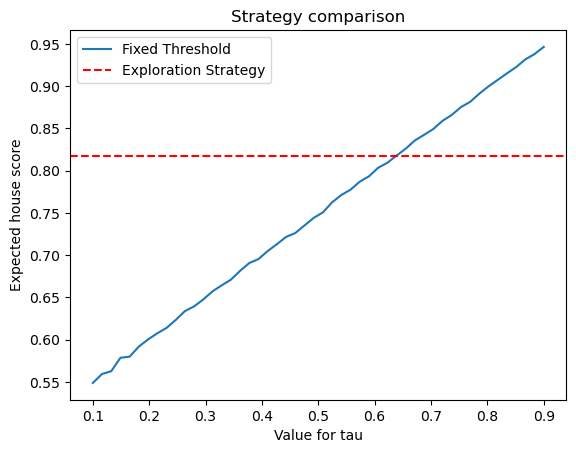

In [12]:
# Plot results
plt.plot(tau_values, fixed_threshold_results, label="Fixed Threshold")
plt.axhline(exploration_result, color='r', linestyle='--', label="Exploration Strategy")
plt.xlabel("Value for tau")
plt.ylabel("Expected house score")
plt.title("Strategy comparison")
plt.legend()
plt.show()

In [ ]:
mu_D = 100  # mean demand
tau_D = 10   # Std dev of demand

m = 1   
s = 3  
c = 5  
p = 10  

sigma_N = 5  

num_simulations = 1000  
theta_values = np.linspace(50, 120, 20) 


In [ ]:
def simulate_inventory(theta):
    total_reward = 0
    for _ in range(num_simulations):
        #demand and order quantity
        D = np.random.normal(mu_D, tau_D)  
        N = np.random.normal(theta, sigma_N)  

        revenue = p * min(N, D)
        cost = c * N
        cleanup_cost = s * max(0, N - D)
        stockout_penalty = m * max(0, D - N)

        # reward function
        reward = revenue - cost - cleanup_cost - stockout_penalty
        total_reward += reward

    # average reward
    return total_reward / num_simulations 

97.89473684210526 439.589867865344


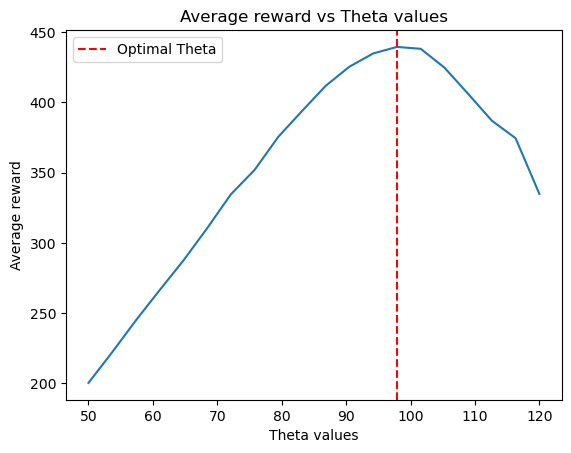

In [ ]:
#different values of theta
theta_rewards = {theta: simulate_inventory(theta) for theta in theta_values}
#print(theta_rewards)

# find best theta
optimal_theta = max(theta_rewards, key=theta_rewards.get)
optimal_theta, theta_rewards[optimal_theta]

print(optimal_theta, theta_rewards[optimal_theta])

# Plot the results
plt.plot(theta_values, list(theta_rewards.values()))
plt.xlabel("Theta values")
plt.ylabel("Average reward")
plt.title("Average reward vs Theta values")
plt.axvline(x=optimal_theta, color='r', linestyle='--', label="Optimal Theta")
plt.legend()
plt.show()

98.18999672703208 [89.39625584693744, 89.47693563005743, 90.30619710070472, 90.97996252830467, 95.72352586631568, 96.54042830760919, 96.27282343860088, 96.04231198153383, 97.06382368417198, 98.18999672703208]


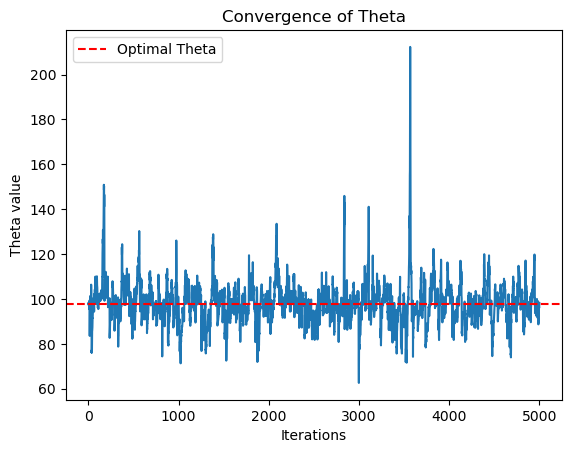

In [ ]:
# Policy Gradient Reinforcement Learning Implementation

alpha = 0.2 
num_iterations = 5000  
theta = 97  
baseline = theta_rewards[optimal_theta]  

theta_history = []

# Policy Gradient Algorithm
for _ in range(num_iterations):
    # sample N from policy
    N = np.random.normal(theta, sigma_N)

    # demand
    D = np.random.normal(mu_D, tau_D)

    # reward function
    revenue = p * min(N, D)
    cost = c * N
    cleanup_cost = s * max(0, N - D)
    stockout_penalty = m * max(0, D - N)
    reward = revenue - cost - cleanup_cost - stockout_penalty

    # policy gradient update
    gradient = (reward - baseline) * (N - theta) / (sigma_N ** 2)
    theta += alpha * gradient

    theta_history.append(theta)

# last 10 updates to see convergence
theta, theta_history[-10:] 
print(theta, theta_history[-10:])
# Plot the convergence of theta
plt.plot(theta_history)
plt.xlabel("Iterations")
plt.ylabel("Theta value")
plt.title("Convergence of Theta")
plt.axhline(y=optimal_theta, color='r', linestyle='--', label="Optimal Theta")
plt.legend()
plt.show()



{1.0: 91.30926054009015, 2.0: 111.8439199085067, 3.0: -140.278057477679, 4.0: 54.65147451588825, 5.0: 96.97054142621135, 6.0: 108.87972443579591, 7.0: 88.15154890510854, 8.0: 95.22872234856783, 9.0: 95.30435337160223, 10.0: 90.87343548443108, 11.0: 99.31377229563864, 12.0: 104.98524947725932, 13.0: 105.81897597213809, 14.0: 96.2514613840881, 15.0: 108.77012053637453, 16.0: 96.54465460664656, 17.0: 98.10112998851638, 18.0: 92.707988486278, 19.0: 87.31219366004623, 20.0: 102.04629830983386}


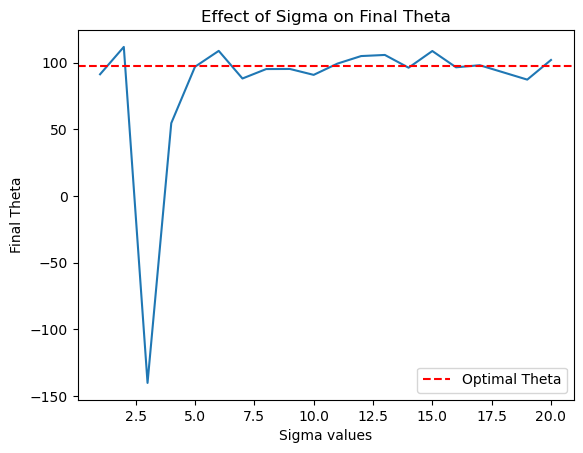

In [ ]:
# test different values of sigma to analyze its effect on results
sigma_values = np.linspace(1,20,20) 
sigma_results = {}

for sigma_test in sigma_values:
    theta_test = 97 
    for _ in range(num_iterations):
        N = np.random.normal(theta_test, sigma_test)
        D = np.random.normal(mu_D, tau_D)

        # reward function
        revenue = p * min(N, D)
        cost = c * N
        cleanup_cost = s * max(0, N - D)
        stockout_penalty = m * max(0, D - N)
        reward = revenue - cost - cleanup_cost - stockout_penalty

        # policy gradient update
        gradient = (reward - baseline) * (N - theta_test) / (sigma_test ** 2)
        theta_test += alpha * gradient

    # final theta
    sigma_results[sigma_test] = theta_test

print(sigma_results)
# Plot the effect of sigma on final theta
plt.plot(sigma_values, list(sigma_results.values()))
plt.xlabel("Sigma values")
plt.ylabel("Final Theta")
plt.title("Effect of Sigma on Final Theta")
plt.axhline(y=optimal_theta, color='r', linestyle='--', label="Optimal Theta")
plt.legend()
plt.show()

